In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
infile = open('..//real_estate_data_frame','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,city,district,localization_y,localization_x,area,sewers,road,fence,water,electricity,gas,price
0,Bełdów-Krzywa Wieś,zgierski,51.835925,19.193010,1004.0,brak,utwardzana,brak,wodociąg w drodze,w drodze,brak,90360.0
1,Stanisławów Nowy,pabianicki,51.801330,19.189772,1200.0,brak,utwardzana,brak,brak,brak,brak,84000.0
2,Julianowo,szczycieński,53.723500,20.867400,1262.0,brak,utwardzana,brak,własne ujęcie/studnia,brak,brak,88340.0
3,Nadarzyn,pruszkowski,52.094000,20.807400,950.0,brak,utwardzana,brak,brak,brak,brak,295000.0
4,Rusiec,pruszkowski,52.065800,20.803900,1160.0,brak,utwardzana,brak,brak,brak,brak,255200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7485,Cholerzyn,krakowski,50.058603,19.773954,1670.0,brak,polna,brak,brak,brak,brak,333000.0
7486,Mogilany,krakowski,49.939618,19.889479,2000.0,brak,polna,brak,brak,brak,brak,360000.0
7487,Nowa Wieś Szlachecka,krakowski,50.026720,19.700051,4400.0,szambo,polna,brak,brak,brak,brak,160000.0
7488,Czernichów,krakowski,49.987773,19.679529,4400.0,brak,polna,brak,brak,brak,brak,440000.0


In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7490 entries, 0 to 7489
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            7490 non-null   object 
 1   district        7490 non-null   object 
 2   localization_y  7490 non-null   float64
 3   localization_x  7490 non-null   float64
 4   area            7490 non-null   float64
 5   sewers          7490 non-null   object 
 6   road            7490 non-null   object 
 7   fence           7490 non-null   object 
 8   water           7490 non-null   object 
 9   electricity     7490 non-null   object 
 10  gas             7490 non-null   object 
 11  price           7490 non-null   float64
dtypes: float64(4), object(8)
memory usage: 702.3+ KB


In [5]:
frame = frame.drop(['city','localization_y','localization_x'],axis=1)

In [6]:
frame['price_of_sqm'] = frame['price']/frame['area']

In [7]:
frame = frame.drop(['price','area'],axis=1)

In [8]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7490 entries, 0 to 7489
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   district      7490 non-null   object 
 1   sewers        7490 non-null   object 
 2   road          7490 non-null   object 
 3   fence         7490 non-null   object 
 4   water         7490 non-null   object 
 5   electricity   7490 non-null   object 
 6   gas           7490 non-null   object 
 7   price_of_sqm  7490 non-null   float64
dtypes: float64(1), object(7)
memory usage: 468.2+ KB


## creating dummy variables

In [9]:
dummies = pd.get_dummies(frame[['district','sewers','road','fence','water','electricity','gas']],drop_first=True)
frame = frame.drop(['district','sewers','road','fence','water','electricity','gas'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [10]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7490 entries, 0 to 7489
Columns: 631 entries, price_of_sqm to gas_w drodze
dtypes: float64(1), uint8(630)
memory usage: 4.6 MB


In [11]:
frame

,price_of_sqm,district_Andrzejów,district_Anin,district_BIAŁOSTOCKI,district_Bacieczki,district_Baranówek,district_Bałuty,district_Bemowo,district_Bezrzecze,district_Biała,...,fence_metalowe,fence_mieszane,fence_siatka,water_wodociąg na działce,water_wodociąg w drodze,water_własne ujęcie/studnia,electricity_na działce,electricity_w drodze,gas_na działce,gas_w drodze
0,90.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,70.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,70.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,310.526316,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,220.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,199.401198,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7486,180.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7487,36.363636,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7488,100.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [12]:
X = frame.drop('price_of_sqm',axis=1).values
y = frame['price_of_sqm'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train= scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
X_train.shape

(5617, 630)

In [20]:
X_test.shape

(1873, 630)

## creating model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

In [22]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=X_test.shape[1]))
model.add(Dense(64,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               80768     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 89,089
Trainable params: 89,089
Non-trainable params: 0
_________________________________________________________________


In [24]:
# from tensorflow.keras.callbacks import EarlyStopping

In [25]:
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [26]:
start = time.time()

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=300,
#           callbacks=[early_stop],
         )

stop = time.time()
print('\n',(stop-start)//60,'min.')

Train on 5617 samples, validate on 1873 samples
Epoch 1/300
5617/5617 [==============================] - 1s 92us/sample - loss: 107557.6329 - val_loss: 114444.1203
Epoch 2/300
5617/5617 [==============================] - 0s 14us/sample - loss: 106606.1730 - val_loss: 112759.7252
Epoch 3/300
5617/5617 [==============================] - 0s 15us/sample - loss: 103736.7062 - val_loss: 108193.9663
Epoch 4/300
5617/5617 [==============================] - 0s 15us/sample - loss: 97259.2889 - val_loss: 99427.5860
Epoch 5/300
5617/5617 [==============================] - 0s 15us/sample - loss: 86991.4311 - val_loss: 87624.5454
Epoch 6/300
5617/5617 [==============================] - 0s 15us/sample - loss: 75766.9660 - val_loss: 77122.6826
Epoch 7/300
5617/5617 [==============================] - 0s 13us/sample - loss: 67790.4179 - val_loss: 71379.9403
Epoch 8/300
5617/5617 [==============================] - 0s 13us/sample - loss: 63996.7558 - val_loss: 68560.5292
Epoch 9/300
5617/5617 [===========

Epoch 72/300
5617/5617 [==============================] - 0s 13us/sample - loss: 24372.1765 - val_loss: 40302.7913
Epoch 73/300
5617/5617 [==============================] - 0s 14us/sample - loss: 24253.0986 - val_loss: 40333.5434
Epoch 74/300
5617/5617 [==============================] - 0s 14us/sample - loss: 24234.0207 - val_loss: 40302.6506
Epoch 75/300
5617/5617 [==============================] - 0s 13us/sample - loss: 24100.7652 - val_loss: 40371.1940
Epoch 76/300
5617/5617 [==============================] - 0s 13us/sample - loss: 24054.3733 - val_loss: 40392.8113
Epoch 77/300
5617/5617 [==============================] - 0s 13us/sample - loss: 23963.4464 - val_loss: 40440.4916
Epoch 78/300
5617/5617 [==============================] - 0s 13us/sample - loss: 23922.3270 - val_loss: 40405.5359
Epoch 79/300
5617/5617 [==============================] - 0s 12us/sample - loss: 23844.6329 - val_loss: 40357.7189
Epoch 80/300
5617/5617 [==============================] - 0s 13us/sample - loss:

Epoch 143/300
5617/5617 [==============================] - 0s 19us/sample - loss: 21616.6647 - val_loss: 40996.9611
Epoch 144/300
5617/5617 [==============================] - 0s 22us/sample - loss: 21602.1908 - val_loss: 40983.0952
Epoch 145/300
5617/5617 [==============================] - 0s 20us/sample - loss: 21579.4021 - val_loss: 40901.2184
Epoch 146/300
5617/5617 [==============================] - 0s 21us/sample - loss: 21594.2732 - val_loss: 40899.4605
Epoch 147/300
5617/5617 [==============================] - 0s 21us/sample - loss: 21559.1480 - val_loss: 40900.0274
Epoch 148/300
5617/5617 [==============================] - 0s 19us/sample - loss: 21549.7467 - val_loss: 41035.8630
Epoch 149/300
5617/5617 [==============================] - 0s 18us/sample - loss: 21522.9498 - val_loss: 40943.8053
Epoch 150/300
5617/5617 [==============================] - 0s 18us/sample - loss: 21516.1642 - val_loss: 40995.7049
Epoch 151/300
5617/5617 [==============================] - 0s 20us/sampl

5617/5617 [==============================] - 0s 19us/sample - loss: 20643.8457 - val_loss: 41191.1008
Epoch 214/300
5617/5617 [==============================] - 0s 18us/sample - loss: 20628.6689 - val_loss: 41231.2234
Epoch 215/300
5617/5617 [==============================] - 0s 18us/sample - loss: 20608.6548 - val_loss: 41198.2203
Epoch 216/300
5617/5617 [==============================] - 0s 18us/sample - loss: 20579.9012 - val_loss: 41222.2583
Epoch 217/300
5617/5617 [==============================] - 0s 19us/sample - loss: 20590.0862 - val_loss: 41278.4089
Epoch 218/300
5617/5617 [==============================] - 0s 18us/sample - loss: 20633.3183 - val_loss: 41209.8776
Epoch 219/300
5617/5617 [==============================] - 0s 18us/sample - loss: 20628.4838 - val_loss: 41266.5051
Epoch 220/300
5617/5617 [==============================] - 0s 18us/sample - loss: 20555.7700 - val_loss: 41266.3027
Epoch 221/300
5617/5617 [==============================] - 0s 20us/sample - loss: 2053

Epoch 284/300
5617/5617 [==============================] - 0s 18us/sample - loss: 19669.2135 - val_loss: 41692.0666
Epoch 285/300
5617/5617 [==============================] - 0s 18us/sample - loss: 19651.9460 - val_loss: 41698.6599
Epoch 286/300
5617/5617 [==============================] - 0s 18us/sample - loss: 19640.1894 - val_loss: 41681.9391
Epoch 287/300
5617/5617 [==============================] - 0s 18us/sample - loss: 19643.2366 - val_loss: 41764.6799
Epoch 288/300
5617/5617 [==============================] - 0s 18us/sample - loss: 19610.0175 - val_loss: 41755.4659
Epoch 289/300
5617/5617 [==============================] - 0s 17us/sample - loss: 19620.7513 - val_loss: 41755.0039
Epoch 290/300
5617/5617 [==============================] - 0s 18us/sample - loss: 19573.1250 - val_loss: 41769.0977
Epoch 291/300
5617/5617 [==============================] - 0s 19us/sample - loss: 19628.9954 - val_loss: 41721.4796
Epoch 292/300
5617/5617 [==============================] - 0s 18us/sampl

In [27]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

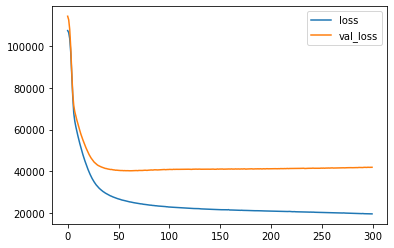

In [28]:
losses.plot()
# plt.ylim(0,20000000000)

## model ewaluation

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [30]:
predictions = model.predict(X_test)

In [31]:
mean_absolute_error(y_test,predictions)

111.23940058012062

In [32]:
np.sqrt(mean_squared_error(y_test,predictions))

204.56536359925138

In [33]:
explained_variance_score(y_test,predictions)

0.4074154502787475

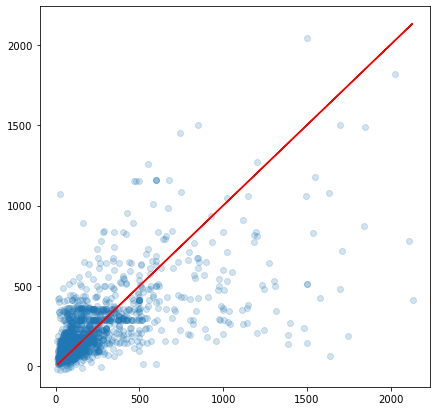

In [34]:
plt.figure(figsize=(7,7))
# plt.xlim(0,3000000)
# plt.ylim(0,3000000)

# Our predictions
plt.scatter(y_test,predictions,edgecolor=None,alpha=0.2)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [35]:
errors = y_test.reshape(y_test.shape[0], 1) - predictions

<AxesSubplot:ylabel='Count'>

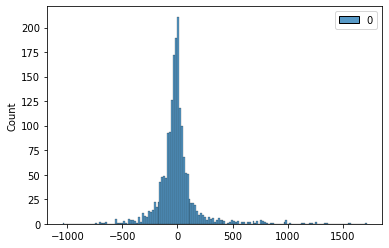

In [36]:
# plt.xlim(-200000,200000)

sns.histplot(errors)

In [37]:
predictions.reshape(y_test.shape[0])[:20]

array([116.145996, 111.657005,  57.66387 , -19.678734, 271.64746 ,
       149.88509 , 156.18622 , 149.88509 , 100.06309 , 182.6457  ,
       159.21051 , 168.07178 , 129.13524 , 377.2058  , 149.88509 ,
       285.47742 , 254.30165 ,  93.11579 , 643.18787 , 177.17345 ],
      dtype=float32)

In [38]:
y_test[:20]

array([150.        ,  73.28447702,  80.        ,  25.        ,
       210.        ,  90.        ,  72.07615594, 120.        ,
        49.95854063, 188.        ,  74.        ,  93.93939394,
       113.33333333, 985.22167488,  36.        , 366.22073579,
       200.51858254, 150.        , 300.        , 222.3869533 ])

In [39]:
predictions.reshape(y_test.shape[0])[:20]-y_test[:20]

array([ -33.85400391,   38.37252829,  -22.33612823,  -44.67873383,
         61.64746094,   59.88508606,   84.11006232,   29.88508606,
         50.10454683,   -5.35429382,   85.21051025,   74.1323834 ,
         15.80190531, -608.01586433,  113.88508606,  -80.74331879,
         53.78306846,  -56.88420868,  343.18786621,  -45.21350664])

In [40]:
predictions.reshape(y_test.shape[0])[:20]/y_test[:20]

array([ 0.77430664,  1.52361059,  0.7207984 , -0.78714935,  1.29355934,
        1.66538985,  2.16696099,  1.24904238,  2.00292255,  0.97151971,
        2.15149338,  1.78915118,  1.13942858,  0.3828639 ,  4.16347461,
        0.77952281,  1.26821987,  0.62077194,  2.14395955,  0.79668993])